Akurasi: 0.5
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.60      0.60      0.60         5

    accuracy                           0.50         8
   macro avg       0.47      0.47      0.47         8
weighted avg       0.50      0.50      0.50         8

Confusion Matrix :
 [[1 2]
 [2 3]]


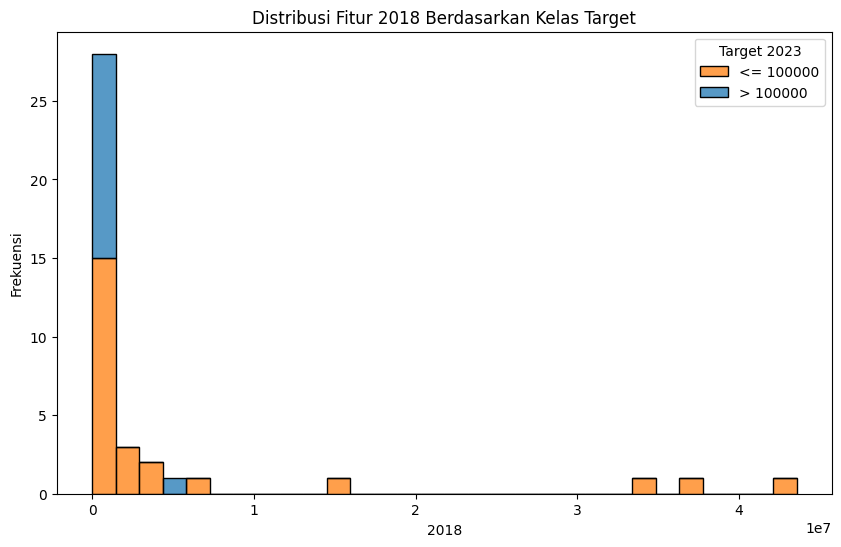

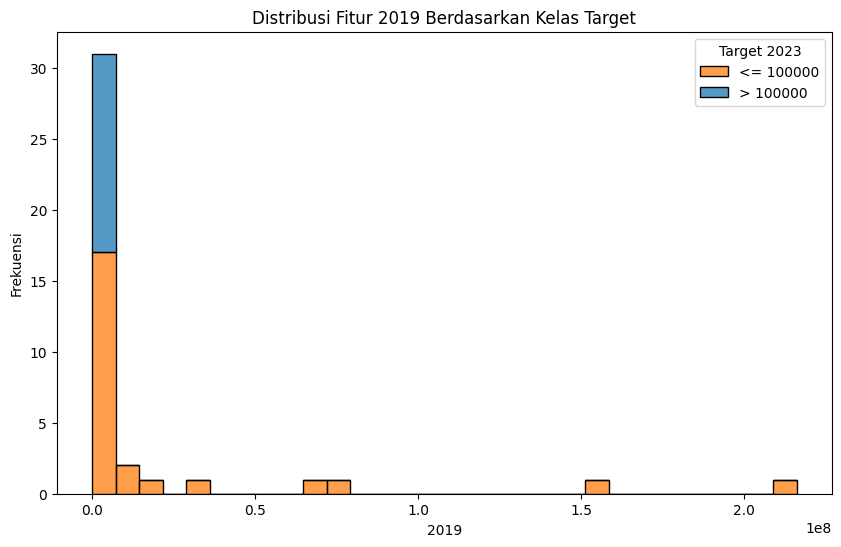

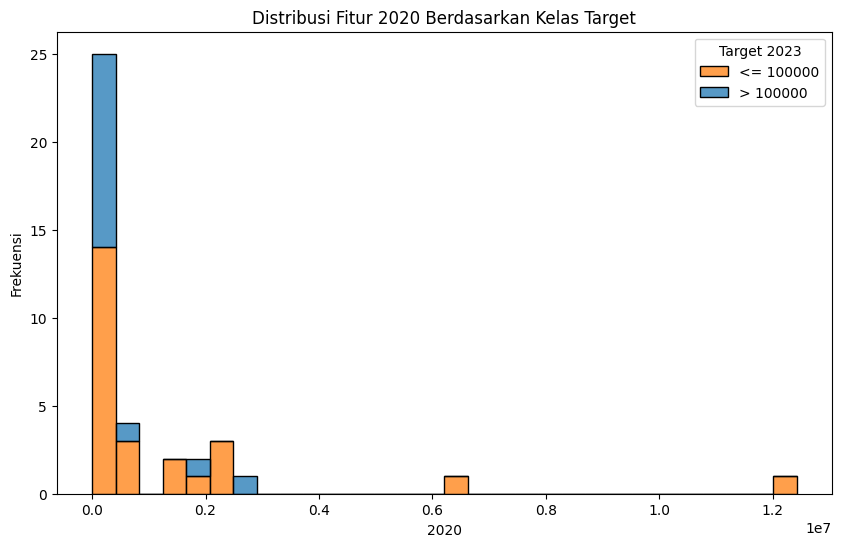

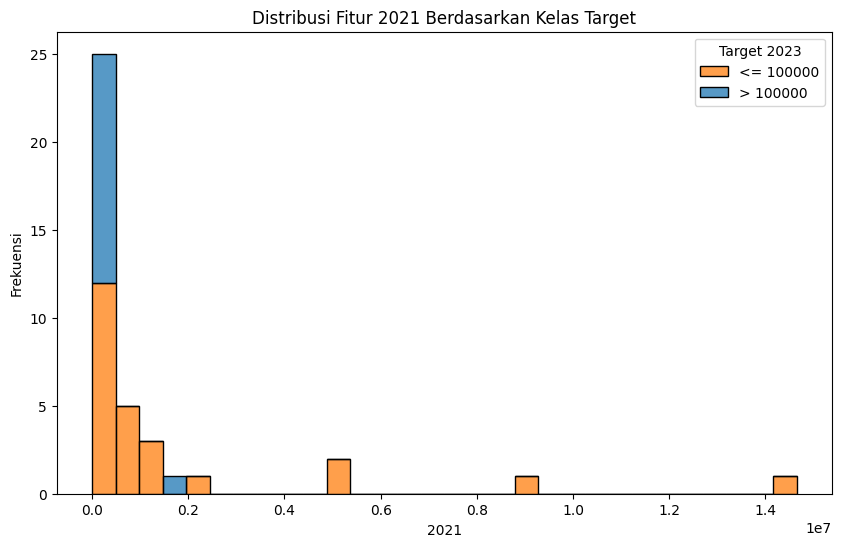

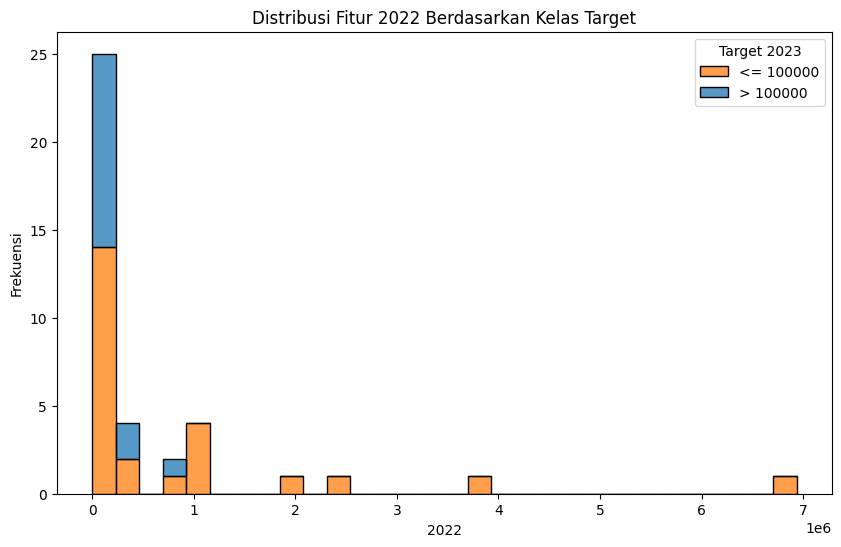

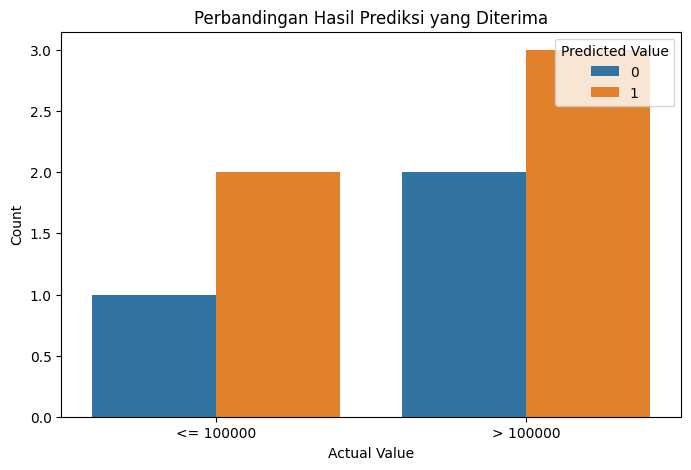

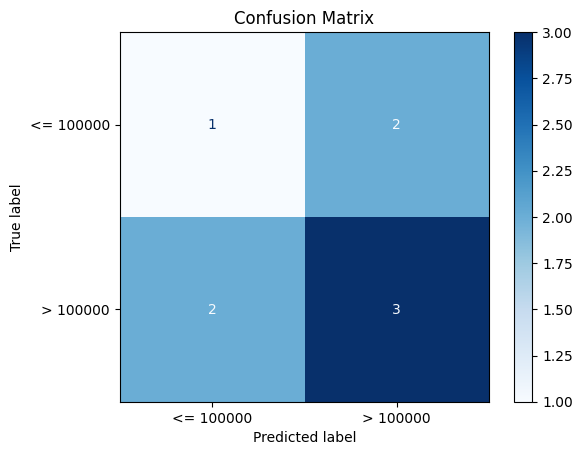

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Membaca dataset
data = pd.read_csv('emisiCO2_test.csv', delimiter=';')

# Mengganti koma dengan titik untuk desimal dan menghapus titik ribuan
for year in ['2018', '2019', '2020', '2021', '2022', '2023']:
    data[year] = data[year].str.replace('.', '', regex=False)
    data[year] = data[year].str.replace(',', '.', regex=False)
    data[year] = pd.to_numeric(data[year], errors='coerce')

# Menghapus nilai null
data.dropna(inplace=True)

# Menambahkan kolom target
threshold = 100000
data['2023_binary'] = (data['2023'] > threshold).astype(int)

# Memisahkan fitur dan target
X = data[['2018', '2019', '2020', '2021', '2022']]
y = data['2023_binary']

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun dan melatih model
model = LogisticRegression()
model.fit(X_train, y_train)

# Memprediksi
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", conf_matrix)

# Visualisasi distribusi setiap fitur berdasarkan target
for year in ['2018', '2019', '2020', '2021', '2022']:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=year, hue='2023_binary', multiple="stack", bins=30)
    plt.title(f'Distribusi Fitur {year} Berdasarkan Kelas Target')
    plt.xlabel(year)
    plt.ylabel('Frekuensi')
    plt.legend(title='Target 2023', loc='upper right', labels=['<= 100000', '> 100000'])
    plt.show()

# Visualisasi hasil prediksi
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(8, 5))
sns.countplot(data=results, x='Actual', hue='Predicted')
plt.title('Perbandingan Hasil Prediksi yang Diterima')
plt.xlabel('Actual Value')
plt.ylabel('Count')
plt.legend(title='Predicted Value', loc='upper right', labels=['0', '1'])
plt.xticks(ticks=[0, 1], labels=['<= 100000', '> 100000'])
plt.show()

# Menampilkan matriks kebingungan
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['<= 100000', '> 100000'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

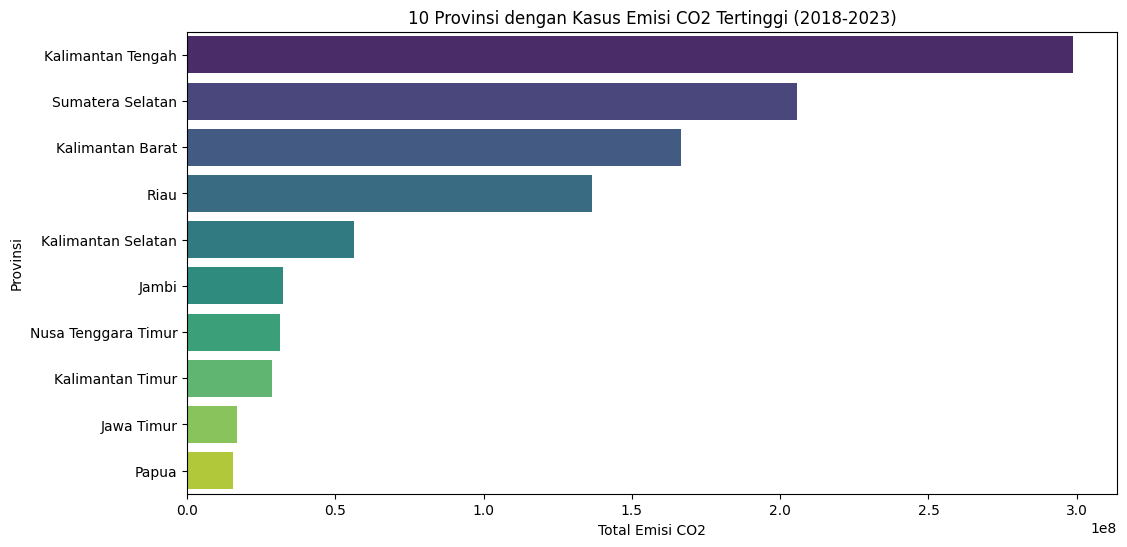

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
data = pd.read_csv('emisiCO2_test.csv', delimiter=';')

# Mengganti koma dengan titik untuk desimal dan menghapus titik ribuan
for year in ['2018', '2019', '2020', '2021', '2022', '2023']:
    data[year] = data[year].str.replace('.', '', regex=False)
    data[year] = data[year].str.replace(',', '.', regex=False)
    data[year] = pd.to_numeric(data[year], errors='coerce')

# Menghapus nilai null
data.dropna(inplace=True)

# Menghitung total emisi CO2 per provinsi selama periode waktu
data['Total_Emisi'] = data[['2018', '2019', '2020', '2021', '2022', '2023']].sum(axis=1)

# Mengambil kolom provinsi dan total emisi
emisi_provinsi = data[['Provinsi', 'Total_Emisi']]

# Mengurutkan berdasarkan total emisi CO2 dari yang tertinggi
emisi_provinsi = emisi_provinsi.sort_values(by='Total_Emisi', ascending=False)

# Menyiapkan data untuk visualisasi
top_n = 10  # Untuk menampilkan 10 provinsi teratas
top_emisi_provinsi = emisi_provinsi.head(top_n)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(data=top_emisi_provinsi, x='Total_Emisi', y='Provinsi', palette='viridis')
plt.title('10 Provinsi dengan Kasus Emisi CO2 Tertinggi (2018-2023)')
plt.xlabel('Total Emisi CO2')
plt.ylabel('Provinsi')
plt.show()